<h1> Lab 3 - Reducing Crime </h1>


- **W203: Statistics for Data Science, Spring 2019**

- **Group Members: Ellie Huang, Kai Qi Lim, Justin Wu, Youzhi (Chloe) Wu**

- **Section Number: 05**

<h2> <font color = blue> 1.0 Introduction </font> </h2>

Politicians often employ a “tough on crime” message on the campaign trail. However, this message may backfire given the complex social, economic, and cultural factors that make up and shape perception of crime from the voter’s perspective. 
 
In the following research, we seek to understand determinants of crime with the aim of providing actionable policy recommendations that are appropriate for the local government. For our analysis, we leveraged panel data for crime (“crime_v2.csv”) from a study by Cornwell and Trumball, researchers from the University of Georgia and West Virginia University. This modified set of panel data contains crime statistics for certain counties in North Carolina. 
 
From this data, we attempt to answer the research question: **How can we leverage tax, policing, and housing policy in our campaign to lower crime?**

<h2> <font color = blue> 2.0 The Initial Data Loading and Cleaning </font> </h2>

**Install and load packages**

In [1]:
# R.Version()

# install stargazer
# install.packages("stargazer", repos="http://cran.us.r-project.org")
library(stargazer)

# install corrplot
# install.packages("corrplot", repos="http://cran.us.r-project.org")
library(corrplot)

# isntall Hmisc (package Hmisc was installed via conda)
# install.packages("Hmisc", repos="http://cran.us.r-project.org")
library(Hmisc)

Warning message:
"package 'stargazer' was built under R version 3.5.2"
Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Warning message:
"package 'corrplot' was built under R version 3.5.3"corrplot 0.84 loaded
Warning message:
"package 'Hmisc' was built under R version 3.5.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.5.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



**Read in crime data**

In [2]:
crime_raw = read.csv("crime_v2.csv", stringsAsFactors = FALSE)
crime_raw = read.csv("C:/Users/justinwu94/Desktop/W203Stats/lab3/crime_v2.csv", stringsAsFactors = FALSE)
crime_raw = data.frame(crime_raw)

* A preliminary look at the crime dataframe shows 97 rows and 25 variables
* Each row represents a county and its related crime statistics
* We observe the last 6 rows of data to be null or blank values. Given no further information on these null rows, we removed them from our dataset
* We observed multiple records for county 193. As such, we removed the duplicate record from our analysis

**Look at dimension and type of variables in the crime dataset**

In [3]:
dim(crime_raw)

str(crime_raw)

[1] 97 25

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : chr  "0.527595997" "1.481480002" "0.267856985" "0.525424004" ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282

**Check if panel data are from the same year**

In [4]:
unique(crime_raw$year)

[1] 87 NA

**Check for any duplicate rows**

In [5]:
duplicate_df <- crime_raw[duplicated(crime_raw) == TRUE,]
duplicate_df

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Check for # of unique values in $prbconv$**

In [6]:
length(unique(crime_raw$prbconv))

[1] 92

**Addressing data anomalies with $prbconv$**

* Viewing the structure of the raw data frame, we observe probability of conviction (prbconv) to be numerical values represented as strings. Therefore, we transformed “probconv” from character into numeric variable in order to appropriately conduct our analysis
* We also observed that some values for probability of conviction and probability of arrest exceed 1. Given that crime statistics are likely aggregated from data sources across various agencies, we recognize this data may contain errors. However, we chose not to remove these values due to lack of decisive evidence indicating an error in the data
* Additionally, it is possible for a person to be convicted of multiple crimes for a single crime. Therefore, a prbconv value of greater than 1 can be legitimate

**Transform $prbconv$ into numerical values**

In [7]:
crime_raw$prbconv <- as.numeric(crime_raw$prbconv)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

**Remove NA and duplicate rows**

In [8]:
crime <- unique(crime_raw[-c(92:97),])

dim(crime)

[1] 90 25

**Addressing data anomalies within wage data**

* While unconfirmed, we suspect the weekly wage data for federal, state, and local employees may have been top and bottom coded before the data was released to the public. We noticed the range for these variables were surprisingly narrow despite the wide variety of positions in the government employee sector. Given that government salary data is available to the public, it may be that outlier wage data at both ends of the spectrum were censored
* Furthermore, we do not have information on how the wage data organizes certain industries into categories, and which industries are excluded. Additionally, it is interesting that government workers follow a  federal, state, and local breakdown, but other industries do not have the same level of detail. Therefore, there may be some overlap between industries and some missing data not presented in the crime dataset 
* We also noticed a wide weekly wage range for the service industry, from a minimum of \\$133 to a maximum of \\$2,177. However, we recognize the service industry contains a wide variety of low to high income occupations and therefore did not consider this outlier as an error that needs to be removed

**Figure 2.1: Box Plot of Fed, State, and Local Wage Data**

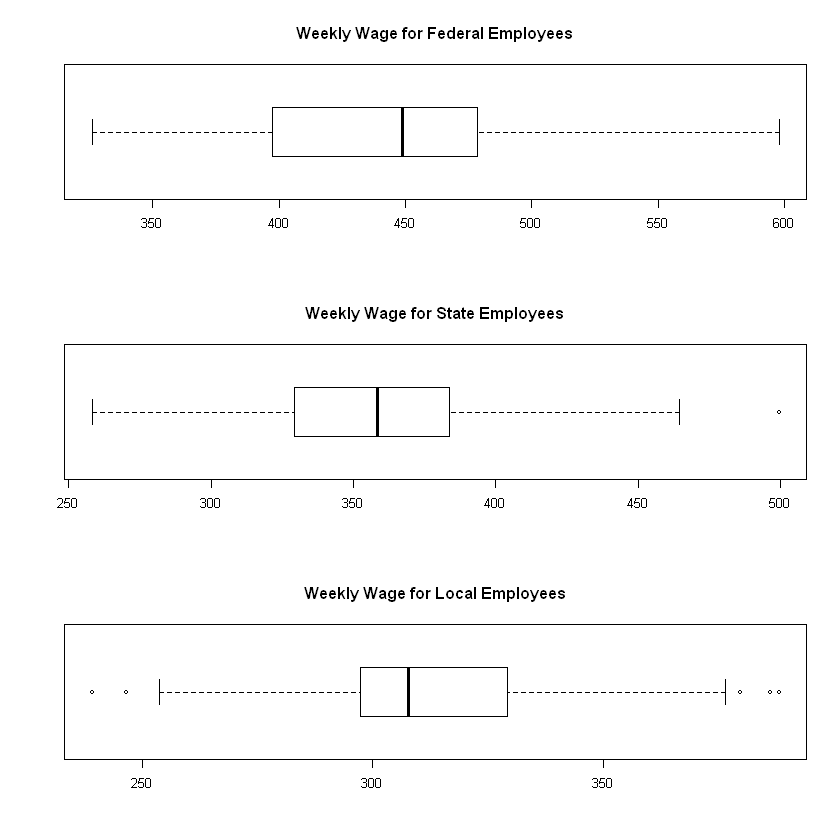

In [9]:
par(mfrow = c(3,1))

boxplot(crime$wfed, main = "Weekly Wage for Federal Employees", horizontal = TRUE)
boxplot(crime$wsta, main = "Weekly Wage for State Employees", horizontal = TRUE)
boxplot(crime$wloc, main = "Weekly Wage for Local Employees", horizontal = TRUE)

**Addressing collinearity within wage data**

* We noticed from the correlation matrix of all variables in the crime dataset that wage variables exhibit collinearity with each other
* Therefore, we transformed the data and take the median of all wages by county to avoid multicollinearity, reduce redundancy and isolate the effect of wage on our selected outcome variable

**Figure 2.2: Correlation Matrix**

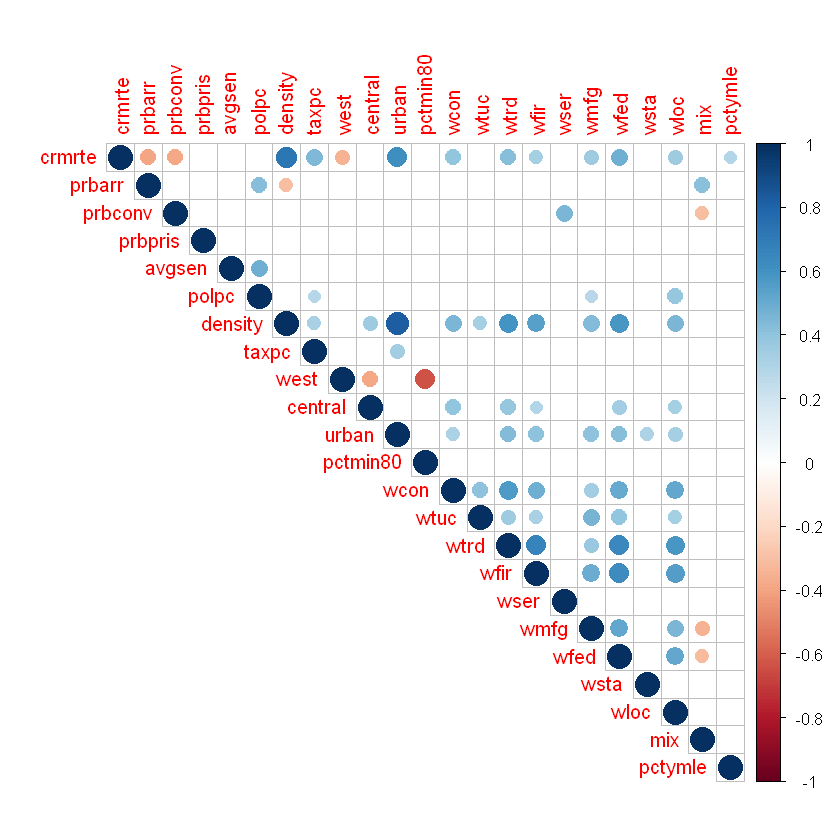

In [10]:
# remove county and year as they are constants
cor_matrix <- rcorr(as.matrix(crime[,-c(1:2)]))

par(mfrow = c(1,1))
corrplot(cor_matrix$r, type = "upper", p.mat = cor_matrix$P, sig.level = 0.01, insig = "blank")

Citation:<br>
http://www.sthda.com/english/wiki/correlation-matrix-a-quick-start-guide-to-analyze-format-and-visualize-a-correlation-matrix-using-r-software

**Transform and add a column of median of all wages**

In [11]:
crime$wmed <- apply(crime[,c("wcon","wtuc","wtrd","wfir","wser","wmfg","wfed","wsta","wloc")],1,median)

**Perform Summary Statistics**

In [12]:
stargazer(crime, title="Summary Statistics", type = "text", digits=2)


Summary Statistics
Statistic N   Mean  St. Dev.  Min   Pctl(25) Pctl(75)   Max   
--------------------------------------------------------------
county    90 100.60  58.32     1      51.5    150.5     197   
year      90 87.00    0.00     87      87       87       87   
crmrte    90  0.03    0.02    0.01    0.02     0.04     0.10  
prbarr    90  0.30    0.14    0.09    0.20     0.34     1.09  
prbconv   90  0.55    0.35    0.07    0.34     0.59     2.12  
prbpris   90  0.41    0.08    0.15    0.36     0.46     0.60  
avgsen    90  9.69    2.83    5.38    7.38    11.47    20.70  
polpc     90 0.002   0.001   0.001   0.001    0.002     0.01  
density   90  1.44    1.52   0.0000   0.55     1.57     8.83  
taxpc     90 38.16   13.11   25.69   30.73    41.01    119.76 
west      90  0.24    0.43     0       0        0        1    
central   90  0.38    0.49     0       0        1        1    
urban     90  0.09    0.29     0       0        0        1    
pctmin80  90 25.71   16.98    1.28 

<h2> <font color = blue> 3.0 The Model Building Process </font> </h2>

<h3> 3.0.1 Exploratory Data Analysis </h3><br>
As the purpose of this research paper is to explore the determinants of crime, the most appropriate outcome variable to use is crimes committed per person (crmrte). Even though crime could be approximated by the probability of arrests and conviction, we believe it is best to use this more direct and contextualized measurement.

**Perform summary statistics for $crmrte$**

In [13]:
summary(crime$crmrte)

sd(crime$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

[1] 0.01888699

**Figure 3.1: Distribution of $crmrte$**

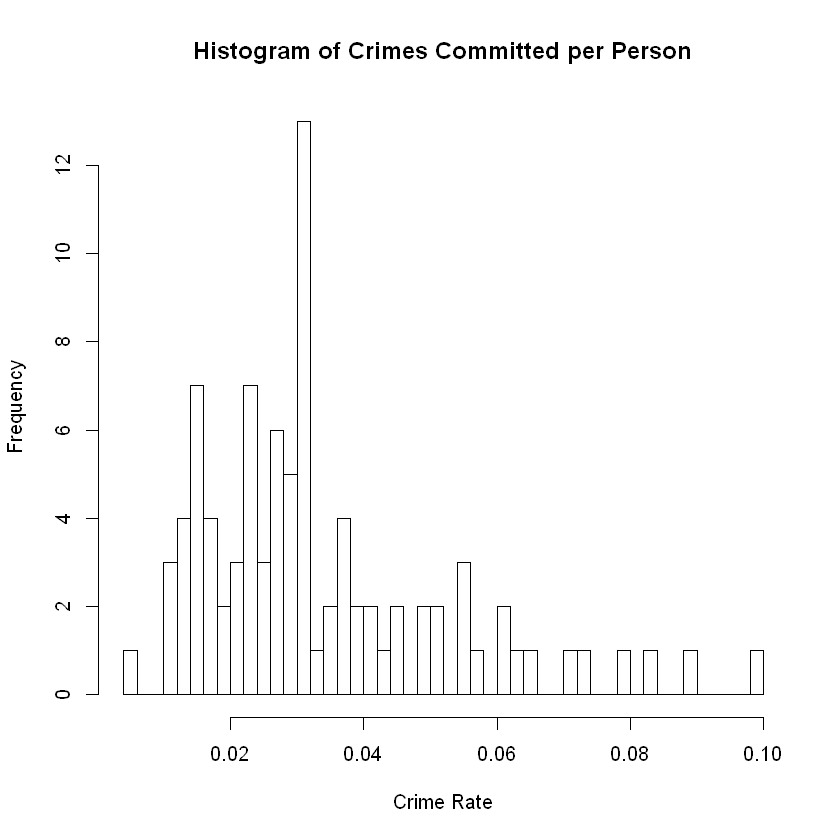

In [14]:
# histogram
hist(crime$crmrte, main = "Histogram of Crimes Committed per Person", xlab = "Crime Rate", breaks = 50)

<h3> 3.0.2 Key Explanatory Variables </h3>

**How can we leverage tax, policing, and housing policy in our campaign to lower crime?**

To answer our research question, we looked at variables related to tax, policing, and housing within the crime dataset. For evaluating tax policy: tax rate per capita (taxpc) acted as a key explanatory variable because it best represented county tax information
* From “taxpc”, we hope to understand how tax revenue -- and underlying policies that shaped current day tax policies -- impact crime rate
* Though we considered using median wage as a key explanatory variable, we viewed the available information on wage as incomplete and thus would result in inaccurate conclusions
* As previously indicated, the wage data in the dataset may not capture all industries, so we proxy the median wage of the county with the available information. While there is a strong correlation between crime per capita and the median wage proxy, the trend may not hold true for these counties if the proxy is inaccurate and built on incomplete information. Therefore median wage seemed inadequate to be a key explanatory variable.

**Perform summary statistics on $taxpc$**

In [15]:
summary(crime$taxpc)

sd(crime$taxpc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.69   30.73   34.92   38.16   41.01  119.76 

[1] 13.11184

**Evaluate correlation between $crmrte$ and $taxpc$**

In [16]:
cor.test(crime$taxpc, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$taxpc and crime$crmrte
t = 4.7101, df = 88, p-value = 9.181e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2663771 0.6000469
sample estimates:
      cor 
0.4487151 


**Figure 3.2: Distribution of $taxpc$**<br>
**Figure 3.3: Correlation plot of $crmrte$ and $taxpc$**

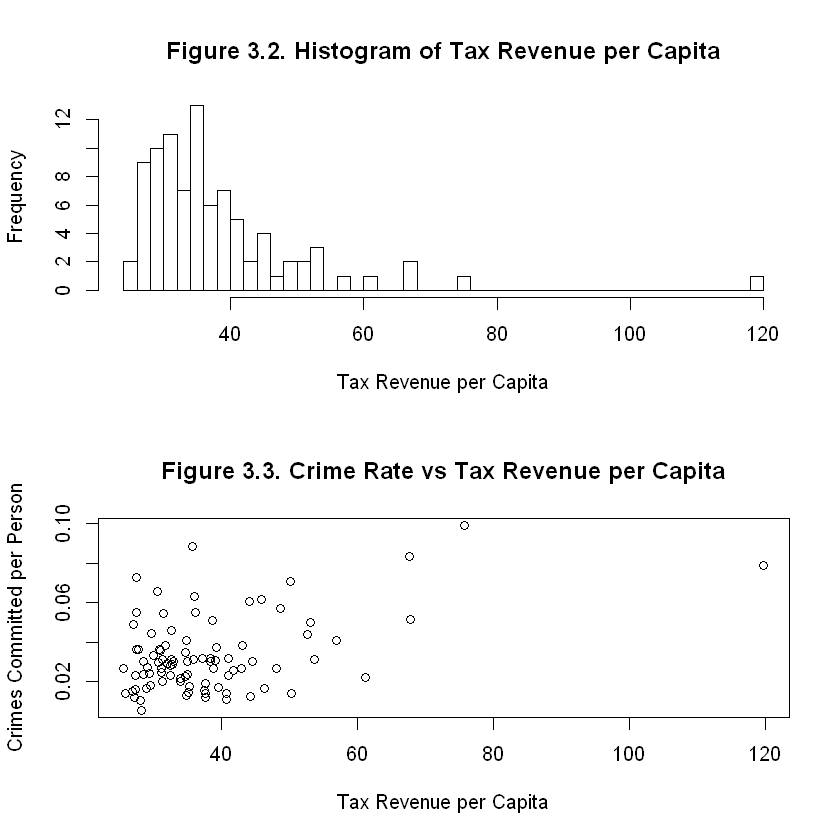

In [17]:
par("pty", mfrow = c(2,1))

# histogram
hist(crime$taxpc, main = "Figure 3.2. Histogram of Tax Revenue per Capita", xlab = "Tax Revenue per Capita", breaks = 50)

# correlation plot
plot(crime$taxpc, crime$crmrte, 
     main = "Figure 3.3. Crime Rate vs Tax Revenue per Capita",
     xlab = "Tax Revenue per Capita",
     ylab = "Crimes Committed per Person")

**Perform summary statistics on $wmed$**

In [18]:
summary(crime$wmed)
sd(crime$wmed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  231.7   294.3   310.1   315.5   331.1   436.8 

[1] 37.77076

**Evaluate correlation between $crmrte$ and $wmed$**

In [19]:
cor.test(crime$wmed, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$wmed and crime$crmrte
t = 5.5766, df = 88, p-value = 2.659e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3398683 0.6493674
sample estimates:
      cor 
0.5109938 


**Figure 3.4: Correlation plot of $crmrte$ and $wmed$**

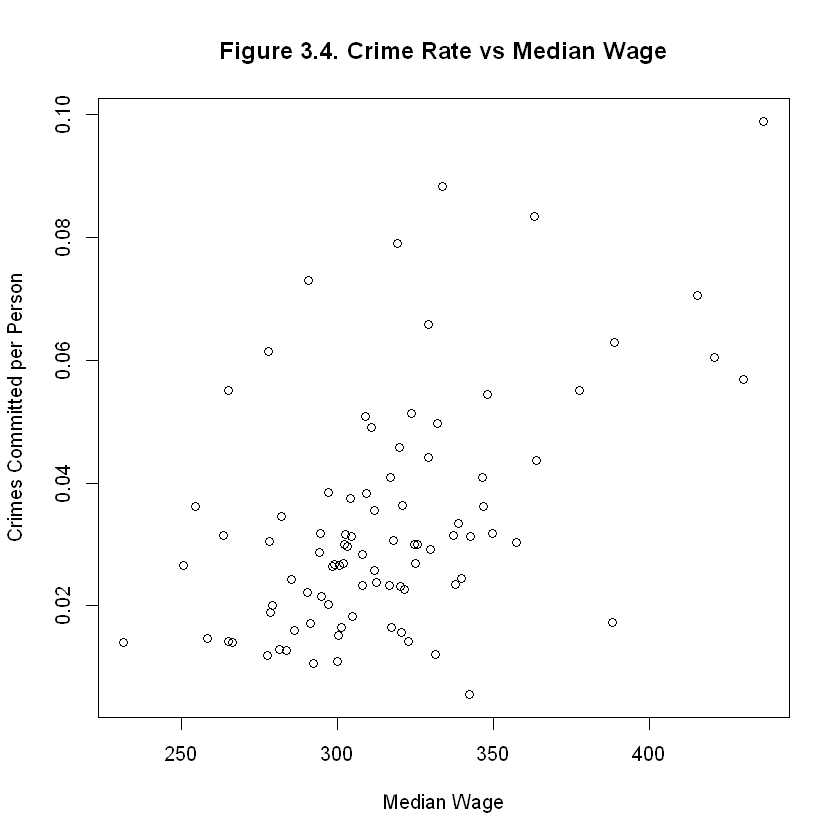

In [20]:
par("pty", mfrow = c(1,1))

# crime and wmed
plot(crime$wmed, crime$crmrte, 
     main = "Figure 3.4. Crime Rate vs Median Wage",
     xlab = "Median Wage",
     ylab = "Crimes Committed per Person")

To evaluate policing policy, probability of conviction (prbconv), probability of arrest (prbarr), and police per capita (polc) were considered as potential variables. 
* However, we believe probability of arrest acts as the best key explanatory variable because it most directly captured policing activity as it relates to crime. Each arrest is reasonably assumed to be carried out by the police force within the county in relations to a offense committed or reported. 
* Conversely, probability of conviction is not a direct measurement of crime rate because not every crime leads to a conviction. Therefore, the probability of conviction may understate the frequency and perception of crime experienced by the population. 
* Lastly, police per capita may be interpreted as a determinant, but also a lagging symptom of crime. For example, some high crime areas may have a high concentration of police force to reduce crime, but some low crime areas may also have a high concentration of police force to prevent crime. In this case, an area’s socio economic factors could play a significant role in police per capita.As such, the relationship of this variable with crime rate is obscure, where including omitted variables could help improve the understanding of crime in the area. 

**Perform summary statistics on $prbarr$**

In [21]:
summary(crime$prbarr)

sd(crime$prbarr)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27146 0.29524 0.34487 1.09091 

[1] 0.137673

**Evaluate correlation between $𝑐𝑟𝑚𝑟𝑡𝑒$ and $prbarr$**

In [22]:
cor.test(crime$prbarr, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$prbarr and crime$crmrte
t = -4.0368, df = 88, p-value = 0.0001153
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5567951 -0.2049707
sample estimates:
      cor 
-0.395283 


**Figure 3.5: Distribution of $prbarr$**<br>
**Figure 3.66: Correlation plot of $crmrte$ and $prbarr$**

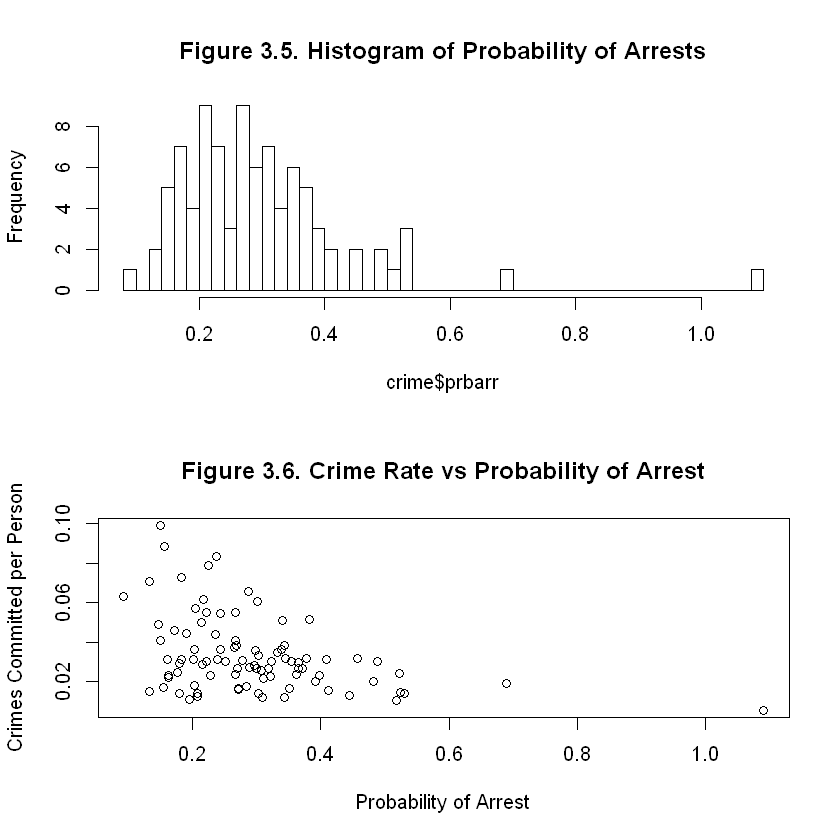

In [23]:
par("pty", mfrow = c(2,1))

# histogram
hist(crime$prbarr, main = "Figure 3.5. Histogram of Probability of Arrests", breaks = 50)

# correlation plot
plot(crime$prbarr, crime$crmrte, 
     main = "Figure 3.6. Crime Rate vs Probability of Arrest",
     xlab = "Probability of Arrest",
     ylab = "Crimes Committed per Person")

**Perform log transformation on $prbarr$ to see if correlation improves**

In [24]:
cor.test(log(crime$prbarr), crime$crmrte)


	Pearson's product-moment correlation

data:  log(crime$prbarr) and crime$crmrte
t = -4.351, df = 88, p-value = 3.638e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5775328 -0.2340713
sample estimates:
       cor 
-0.4207661 


For evaluating housing policy, we chose density per capita (density) because it best approximated where populations are concentrated and presumably residing in. From the density data, we hope to understand if the population’s living circumstances have an impact on crime rate. 

**Perform summary statistics on $density$**

In [25]:
# evaluate density
summary(crime$density)
sd(crime$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

[1] 1.521554

**Evaluate correlation between $crmrte$ and $density$**

In [26]:
# evaluate correlation between crmrte and density
cor.test(crime$density, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$density and crime$crmrte
t = 9.9721, df = 88, p-value = 4.101e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6138760 0.8128519
sample estimates:
      cor 
0.7283706 


**Figure 3.7: Distribution of $density$**<br>
**Figure 3.8: Correlation Plot of $crmrte$ and $density$**

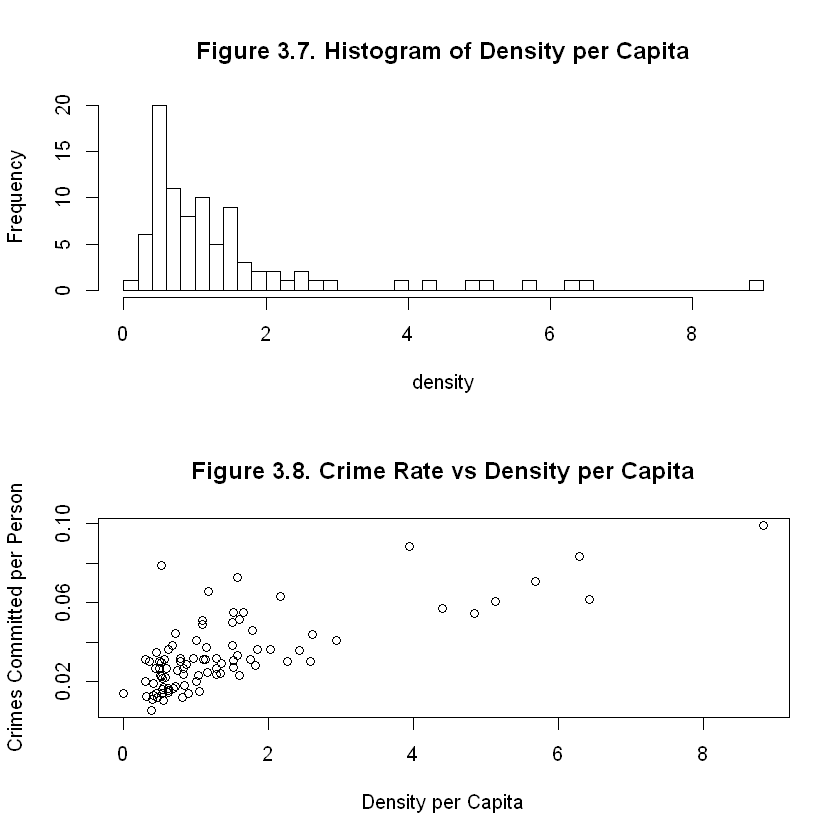

In [27]:
par("pty", mfrow = c(2,1))

# histogram
hist(crime$density, main = "Figure 3.7. Histogram of Density per Capita", xlab = "density", breaks = 50) 

# correlation plot
plot(crime$density, crime$crmrte, 
     main = "Figure 3.8. Crime Rate vs Density per Capita",
     xlab = "Density per Capita",
     ylab = "Crimes Committed per Person")

<h2><font color = blue> 4.0 Regression Models: Base Model </font></h2>

<h3>4.0.1 Identify Key Explanatory Variables</h3>

For our Model 1, the following fields are identified as key explanatory variables. 

$$crmrte={\beta }_{0}+{\beta }_{1}\cdot prbarr + {\beta }_{2}\cdot density + {\beta }_{3}\cdot taxpc + u$$

> The direction of the association is presented in the Introduction and Model Building Process sections above.
- taxpc: tax revenue per capita 
    - This variable is positively correlated with our dependent variable, crmrte. 
    - We are interested in the expected increase on crime rate generated by a unit increase of taxpc by evaluating its coefficient. 
- prbarr: probability of arrests 
    - This variable is negatively correlated with crmrte. 
    - We would like to see the expected decrease in crmrte with a unit increase of prbarr by evaluating its coefficient. 
- density: density per square mile 
    - This variable is positively correlated with crmrte. 
    - We would like to see the expected increase in crmrte with a unit increase of density by evaluating its coefficient.

Our hypotheses examining the significance of coefficients are constructed as following:
- $H_{0}$: ${\beta }_{1} = {\beta }_{2} = {\beta }_{3} = 0$
- $H_{a}$: ${\beta }_{1} \neq 0$, ${\beta }_{2} \neq 0$, and ${\beta }_{3} \neq 0$

<h3>4.0.2 Examine CLM Assumptions</h3>

We have examined the following CLM assumptions for our Model 1 variables by plotting four graphs and running Pearson’s correlation tests among predictors. Here are our findings for each assumption:  
1. **Data Linearity**: the relationship between three predictors (taxpc, prbarr, and density) and the outcome (crmrte) is assumed to be linear. We use **Residuals vs Fitted** diagnostic plot to check the linear relationship assumptions. A horizontal line indicates a linear relationship. Note that for Model 1, our data (indicated by red line) deviates slightly downwards from the horizontal dotted line, which may suggest the presence of a pattern and indicate a problem with aspects of our model. 
2. **Normality of residuals**: The **Normal Q-Q** diagnostic plot is used to examine whether the residuals are normally distributed. A straight dashed line indicates a good normal distribution. Note that for Model 1, our data follows the straight dashed line, although it deviates upwards on the right. 
    - We also tried several transformations, such as using log(crmrte) as the dependent variable, and log-log transformation of both dependent and independent variables in Model 1. These transformations help improve the normality of residuals. However, doing so weakens other assumptions such as data linearity, homogeneity of residual variance, and zero conditional mean of error term. Therefore, we still keep crmrte (without any transformation) as our dependent variable in our model. 
3. **Homogeneity of residual variance**: the residuals are assumed to have a constant variance. The **Scale-Location** diagnostic plot is used to check the homogeneity of variance of the residuals. A horizontal line with equally spread points indicate homoscedasticity. Note that for Model 1, this is not the case as the residual points increase and decrease with the value of the fitted outcome variable. This may suggest non-constant variances in the residuals errors. To address heteroskedasticity, we use robust standard errors. 
4. **Independence of error term**: one observation of the error term should not predict the next observation. The error term accounts for the variation in the dependent variable that the independent variables do not explain. The error term represents unpredictable random error and therefore, random chance should determine the values of the error term. A **Residuals vs. Order** plot could be drawn to assess the independence of error term if the collection order is known. However, in our study, we do not have the knowledge of collection order, and thus unable to produce such plot to demonstrate its independence. 
5. **Zero conditional mean of error term**: we assume that there is no functional relationship between our predictors and the error term, u. From the **Residuals vs Fitted** diagnostic plot, we can check if this assumption is met by our model or not. As shown in the plot, our data (indicated by red line) deviates slightly downwards from the horizontal dotted line. Therefore, we do realize that crime rate is in fact determined by multiple factors and may not just limit to the three key explanatory variables as in our Model 1. We acknowledge that omitted variable bias, or measurement error in the independent variables may render our Model 1 not fully in compliance with this assumption. 
6. **Random (i.i.d) Sampling**: our samples are collected for each county in NC state independently. Therefore, we believe that this assumption is met by our model. 
7. **No Perfect Multicollinearity**: no independent variable is a perfect linear function of other explanatory variables. We ran the Pearson’s correlation test on the three predictors and we do not see strong correlations between them. The correlation coefficient between taxpc and prbarr is -0.135; coefficient between taxpc and density is 0.322; and finally, coefficient between density and prbarr is -0.313. As such, we believe our model meets this assumption. 
 
In addition, we plotted **Residuals vs Leverage** graph to to identify extreme values that might influence regression results when included or excluded from the model. Note that for Model 1, we notice the presence of an outlier on the upper right corner which may influence against a regression line in our model.


In [28]:
# install.packages("lmtest", repos="http://cran.us.r-project.org")
library(lmtest)

# install.packages("sandwich", repos="http://cran.us.r-project.org")
library(sandwich)

Warning message:
"package 'lmtest' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



**Figure 4.1: Model 1 Regression Diagnostic Plots**

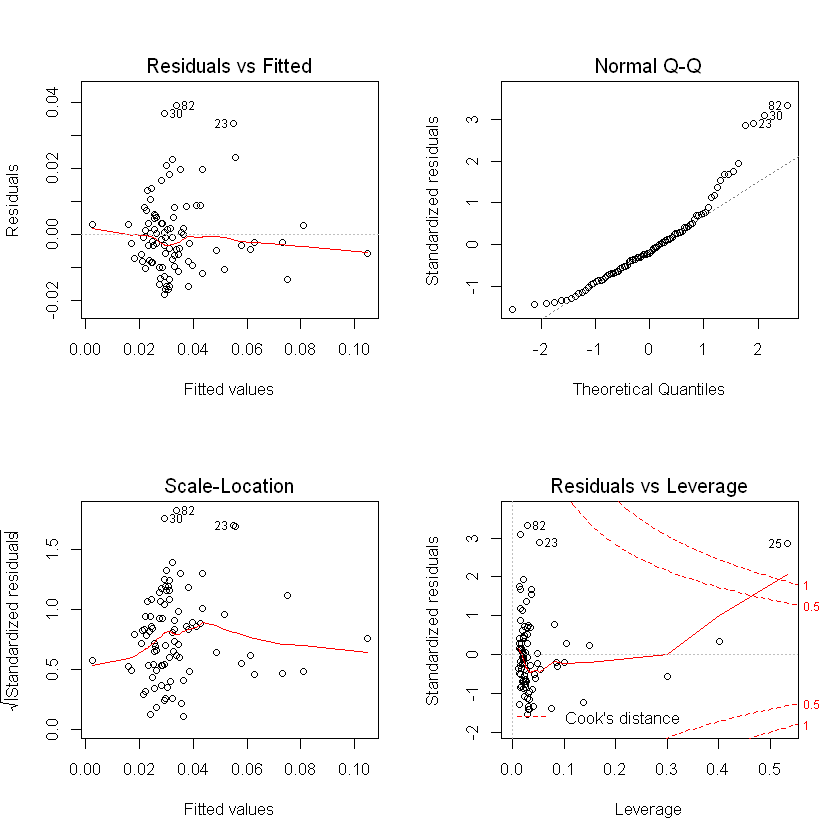

In [29]:
# Create Model 1
model1 <- lm(crmrte ~ prbarr + density + taxpc,
             data = crime)

# regression diagnostics plots to check data assumptions
par(mfrow = c(2,2))
plot(model1)

In [30]:
# prbarr and taxpc
cor.test(crime$taxpc, crime$prbarr)

# density and taxpc
cor.test(crime$taxpc, crime$density)

# density and prbarr
cor.test(crime$prbarr, crime$density)


	Pearson's product-moment correlation

data:  crime$taxpc and crime$prbarr
t = -1.2993, df = 88, p-value = 0.1973
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.33477097  0.07194407
sample estimates:
      cor 
-0.137191 



	Pearson's product-moment correlation

data:  crime$taxpc and crime$density
t = 3.1696, df = 88, p-value = 0.0021
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1210329 0.4944170
sample estimates:
      cor 
0.3201007 



	Pearson's product-moment correlation

data:  crime$prbarr and crime$density
t = -2.9794, df = 88, p-value = 0.003733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4797216 -0.1020062
sample estimates:
       cor 
-0.3027029 


<h3>4.0.3 Model Specifications</h3>

From the stargazer table below, we could summarize our Model 1 specifications as following:
- The crime rate (crmrte) is expected to:
    - Decrease by 0.025 crimes per capita with a unit increase in probability of arrest (prbarr), holding all other factors constant;
    - Increase by 0.007 crimes per capita with a unit increase in population density (density), holding all other factors constant;
    - Increase by 0.0003 crimes per capita with a unit increase in tax revenue per capita (taxpc), holding all other factors constant;
- The adjusted R square of Model 1 is 0.599, and the AIC for Model 1 is -535.361. 


In [31]:
# Use robost standard error in case of heteroskedasticity
se.model1 = coeftest(model1, vcov = vcovHC)[ , "Std. Error"]

# Calculate AIC for model 1
(model1$AIC <- AIC(model1))

# Display Model 1 in regression table
stargazer(model1, type = "text", title = "Model 1 Results",
          ci.levels = .95, align = T, single.row = T,
          se = list(se.model1),
          star.cutoffs = c(0.05, 0.01, 0.001))

[1] -535.3614


Model 1 Results
                         Dependent variable:     
                    -----------------------------
                               crmrte            
-------------------------------------------------
prbarr                    -0.025** (0.008)       
density                   0.007*** (0.001)       
taxpc                      0.0003 (0.0003)       
Constant                    0.017 (0.010)        
-------------------------------------------------
Observations                     90              
R2                              0.612            
Adjusted R2                     0.599            
Akaike Inf. Crit.             -535.361           
Residual Std. Error        0.012 (df = 86)       
F Statistic            45.288*** (df = 3; 86)    
Note:               *p<0.05; **p<0.01; ***p<0.001

Model 1 Results
=====
0.950
-----


<h3>4.0.4 Interpretations and Conclusions</h3>

- **prbarr**, ${\beta }_{1}$: 
    - As presented in our Model 1, increasing the probability of arrest could decrease our dependent variable, crmrte. 
    - Based off our Model 1 results, the p value for ${\beta }_{1}$ is statistically significant at a 99\% confidence level ($\alpha$ = 0.01). We reject our null hypothesis and conclude that the coefficient of probability of arrest predicting crime rate is not zero. 
    - We believe that probability of arrest shows certain practical significance. It serves as a more straightforward indicator than probability of conviction in terms of understanding policing capability in dealing with crimes. Probability of conviction / sentence may be reduced depending on defendants’ lawyers or prosecutor leniency. With higher probability of arrest, it may indicate better policing skills which could discourage criminals / offenders taking illegal actions. 
    - As such, we would make the following policy recommendations: 
        - Increase police training to improve skills and capabilities
        - Direct local rules and laws towards stricter consequences for arrests
- **density**, ${\beta }_{2}$: 
    - As presented in our Model 1, increasing the population density would increase our crime rate crmrte. 
    - Based off our Model 1 results, the p value for ${\beta }_{2}$ is statistically significant at a 99.9\% confidence level ($\alpha$ = 0.001). We reject our null hypothesis and conclude that the coefficient of density predicting crime rate is not zero. 
    - We believe that density shows certain practical significance. Higher density could result in more person-to-person contact and conflicts. Areas with heavy commercial activities or densely populated apartment complexes tend to be harder to regulate than single family areas. 
    - Therefore, we would make the following policy recommendations:
        - Offer housing credits to low or middle income class families so that they could move to less populated and more desirable areas 
        - Reevaluate county zoning rules to better distribute local population to better reflect diversity, and improve social and economic equality. 
- **taxpc**, ${\beta }_{3}$: 
    - As presented in our Model 1, this variable is positively correlated effect on with our dependent variable, crmrte. With an increase in tax revenue per capita, we see a relatively small increase in crime rate, compared with the other two predictors. 
    - Based off our Model 1 results, the p value for ${\beta }_{3}$ is not statistically significant for us to reject our null hypothesis. It reveals that **taxpc** has a low impact on changing crime rate. 
    - While the test does not show statistical significance, it does not mean that its practical significance is low. We suspect that this is due to the fact that tax revenue per capita is influenced by various factors, such as local tax rate, economic composition of the county (for instance, share of commercial vs. residential areas), makeup of the tax system (i.e. heavy on personal or business income), etc. 
    - Potential reasons for tax revenue per capita having such effect on crime rate could be due to:
        - Relatively more composition of commercial activities in the county;
        - Or in the case where the residential composition is high in the county, heavier tax rate on personal income 
        - High tax in lower income areas may lead to higher crime rate
        - Higher tax rate is a symptom of income inequality, therefore we recommend further exploration on understanding the wealth gap within counties to effectively reduce crime
    - Therefore, in order to lower local crime rate, we suggest to
        - Reduce personal tax rate to make our tax system more progressive
        - Allocate more police resources to dense commercial areas to improve stability and security
        - Change tax bracket to tax more on the rich and less on the poor
        - Evaluate more on the effect of income gap on crime rate to make further recommendations

<h2> <font color = blue> 4.1 Regression Model: Second Model </font></h2>

<h3>4.1.1 Identify Covariates</h3>

Variables that could affect the explanatory variables in Model 1 were identified as covariates and added in Model 2 to reduce omitted variable bias. In addition, some variables were found to show high linearity with crime rate although they do not quite follow our research questions and political campaign. These fields are introduced as covariates in Model 2 to improve accuracy of the regression and to expand upon the key predictors from Model 1 as action items in the political campaign by better approximating the distribution of crime rate.

> * **pctmin80**: percentage of minority, 1980. Minorities tend to conglomerate in dense areas within their cultural and ethnic communities, therefore in counties with high percentage of minority, density per capita would change too. Hence, it is a covariate for density per capita.
    
> * **pctymle**: percentage young male in population.
This variable was found to have unique correlation with crime rate and no other variable. Young males are also known to have a tendency in crime participation, hence, adding this as covariate could better identify the effect size of the explanatory variables.

> * **prbconv**: probability of conviction.
Higher crime rates were observed in counties with higher probability of conviction. Although the observation is counter-intuitive as one would expect lower crime rates where certainty of punishment is higher, it can be considered as a lagging response to crime rate, the dependent variable. Therefore, it would be a covariate for probability of arrest. 

> * **polpc**: police per capita.
Similar to probability of conviction, police per capita is considered as a lagging response to the dependent variable as higher crime rates were observed in counties with higher police per capita. 

The model 2 equation is built by adding the terms (explanatory variables and covariates) together, where u represents the model error such that:

$$crmrte={\beta }_{0}+{\beta }_{1}\cdot prbarr+{\beta }_{2}\cdot density+{\beta }_{3}\cdot taxpc+{\beta }_{4}\cdot pctmin80\\
+{\beta }_{5}\cdot pctymle+{\beta }_{6}\cdot prbconv+{\beta }_{7}\cdot polpc+u$$

Our hypotheses examining the significance of coefficients are constructed as following:
- $H_{0}$: ${\beta }_{1} = {\beta }_{2} = {\beta }_{3} = {\beta }_{4} = {\beta }_{5} = {\beta }_{6} = {\beta }_{7} = 0$
- $H_{a}$: ${\beta }_{1} \neq 0$, ${\beta }_{2} \neq 0$, ${\beta }_{3} \neq 0$, ${\beta }_{4} \neq 0$ ${\beta }_{5} \neq 0$, ${\beta }_{6} \neq 0$, and  ${\beta }_{7.} \neq 0$

**Figure 4.2: Model 2 Regression Diagnostics Plots**

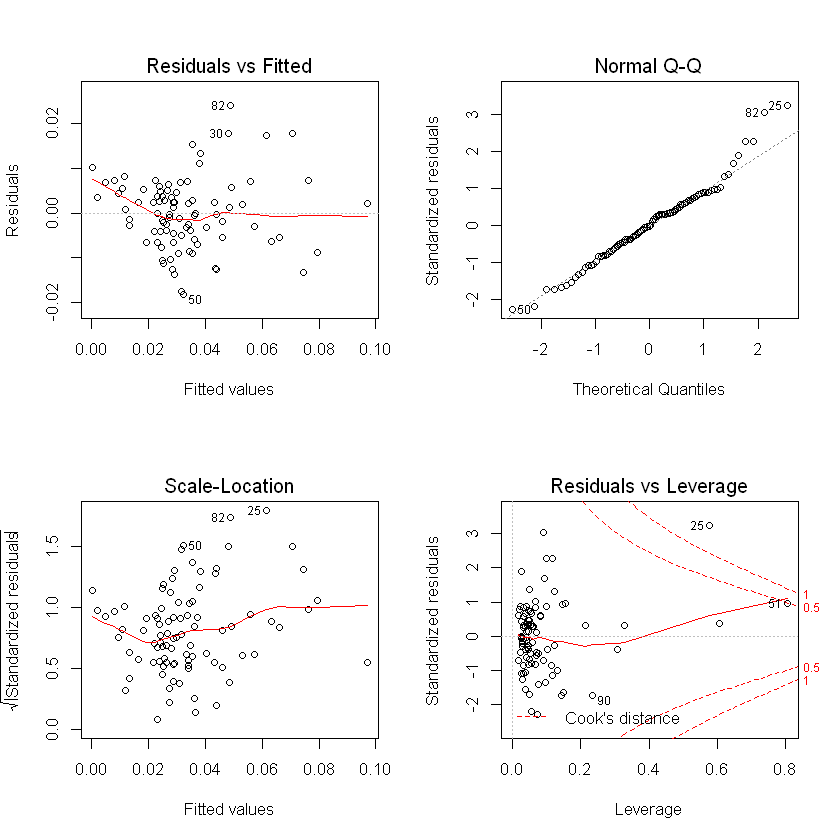

In [32]:
# Model2: Added covariates
model2 <- lm(crmrte ~ prbarr + taxpc + density + pctmin80 +pctymle + prbconv + polpc, data = crime)

# Use robost standard error in case of heteroskedasticity
se.model2 <- coeftest(model2, vcov = vcovHC)[ , "Std. Error"]

# Calculate AIC for model 2
model2$AIC <- AIC(model2)

# regression diagnostics plots to check data assumptions
par(mfrow=c(2,2))
plot(model2)

<h3> 4.1.2 Examine CLM Assumptions </h3>

Similar to the previous section, the discussion for each assumption is presented below:  

1. **Data Linearity**: It is assumed that the true relationship between crime rate and explanatory variables and covariates in model 2 are linear. From the residuals vs fitted values plot, the red line deviates from the horizontal line in the beginning then decreases and adheres better. Hence, there is some deviation from the linear relationship in Model 2. 

2. **Normality of residuals**: From the histogram below, the residuals has a distribution close to normal. From the QQ-plot, the data points follows the diagonal for most part but shows slight deviation at the end of the plot. There could be some slight violation in the normality of residuals but the number of observations is more than 30, hence, the CLM asymptotics will kick in.

3. **Homogeneity of residual variance**: The residuals do not form a roughly horizontal band around the 0 line in the Residuals vs Fitted values plot. In addition, from the Scale-Location diagnostic plot, the best fit line shows a dip, suggesting that homoscedasticity is not met for Model 2. To address heteroskedasticity, we use robust standard errors. 

4. **Independence of error term**: A Residuals vs. Order plot could be drawn to assess the independence of error term if the collection order is known. However, in our study, we do not have the knowledge of collection order, and thus unable to produce such plot to demonstrate its independence. 

5. **Zero conditional mean of error term**: It is assumed that there is no functional relationship between the predictors and the error term, u.  However, we do realize that crime rate is in fact determined by multiple factors not limited to the predictors available to us in the dataset. Therefore, we acknowledge that omitted variable bias, or measurement error in the independent variables may result in Model 2 violating this assumption. 

6. **Random (i.i.d) Sampling**: Samples are collected for each county in NC state independently. Therefore, we believe that this assumption is met. 

7. **No Perfect Multicollinearity**: No independent variable is a perfect linear function of other explanatory variables. We ran the Pearson’s correlation test on all predictors of Model 2 and present the values in the table as shown. The coefficients show small to moderate correlation. As such, we believe our model meets this assumption.
 
In addition, we plotted Residuals vs Leverage graph to to identify outliers that might have high influence. For Model 2, there are three points high in leverage, which we examine further for their influence. Only one of the points is above Cook’s distance of 1.0, indicating it is an outlying point and has high potential to affect the model’s coefficients. We further investigated this particular data point which showed particularly high taxpc but otherwise similar in magnitude for other variables. Without additional information on this data point, there is insufficient reason to omit the data point from the model.


**Figure 4.3: Distribution of Model 2 Residuals**

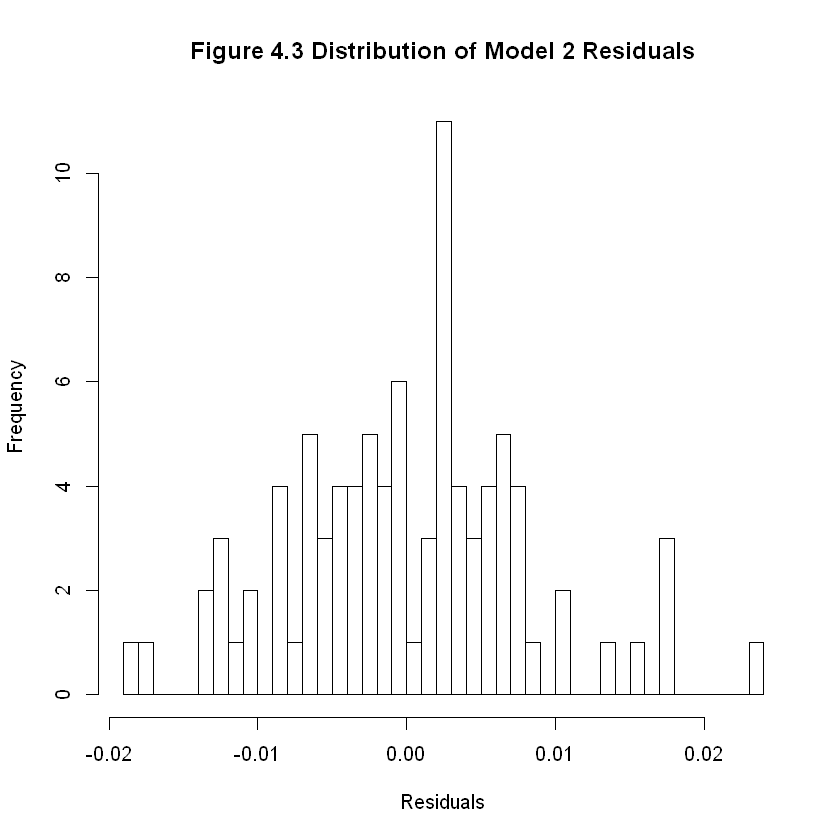

In [33]:
hist(model2$residuals, breaks = 50, main = "Figure 4.3 Distribution of Model 2 Residuals", xlab = "Residuals")

In [34]:
# checking multicollinearity assumption
m2_data <- crime[,c(4,5,8,9,10,14,25)]
cor(m2_data, method = 'pearson')

,prbarr,prbconv,polpc,density,taxpc,pctmin80,pctymle
prbarr,1.00000000,-0.05579621,0.42596480,-0.30270285,-0.13719105,0.04907002,-0.18096201
prbconv,-0.05579621,1.00000000,0.17186514,-0.22666583,-0.12738963,0.06249824,-0.16222602
polpc,0.42596480,0.17186514,1.00000000,0.15910885,0.28055317,-0.16911753,0.05022177
density,-0.30270285,-0.22666583,0.15910885,1.00000000,0.32010075,-0.07458003,0.11523213
taxpc,-0.13719105,-0.12738963,0.28055317,0.32010075,1.00000000,-0.02797739,-0.09154375
pctmin80,0.04907002,0.06249824,-0.16911753,-0.07458003,-0.02797739,1.00000000,-0.01925657
pctymle,-0.18096201,-0.16222602,0.05022177,0.11523213,-0.09154375,-0.01925657,1.00000000


<h3> 4.1.3 Model Specifications </h3>

The regression model results of model 1 and 2 are presented in the stargazer table below.

In [35]:
# Display Model 1 and Model 2 in regression table
stargazer(model1, model2, type = "text", omit.stat = "f",
          title = "Model 1 and Model 2 Comparison",
          se = list(se.model1, se.model2),
          star.cutoffs = c(0.05, 0.01, 0.001))


Model 1 and Model 2 Comparison
                          Dependent variable:      
                    -------------------------------
                                crmrte             
                          (1)             (2)      
---------------------------------------------------
prbarr                 -0.025**        -0.056***   
                        (0.008)         (0.013)    
                                                   
density                0.007***        0.005***    
                        (0.001)         (0.001)    
                                                   
pctmin80                               0.0004***   
                                       (0.0001)    
                                                   
pctymle                                 0.088*     
                                        (0.041)    
                                                   
prbconv                                -0.019***   
                                

The adjusted R-squared of model 1 is 0.599 and model 2 0.808. With the higher adjusted R-squared value, model 2 would provide a better prediction of crime rate. The AIC of model 1 is -535 and model 2 -598. The more negative AIC value of model 2 shows a better performance in goodness of fit and parsimony compared to model 1. With the covariates included, coefficients of explanatory variables in Model would be closer to true effect. 

<h3> 4.1.4 Interpretations and Conclusions</h3>

With the covariates introduced in model 2, the following changes were observed in the coefficients for the explanatory variables: removing omitted variable bias, isolating true effect.

- **prbarr**, ${\beta }_{1}$: 
    - The coefficient for prbarr has changed from -0.025 to -0.056. We can expect that the true effect of probability of arrest is bigger on crime rate. 
    - Based off our Model 2 results, the p value for ${\beta }_{1}$ is now more statistically significant at a 99.9% confidence level ($\alpha $ = 0.001; previously statistically significant at $\alpha$ = 0.01). We reject our null hypothesis and further support the results from Model 1.
    - This variable would be a strong deterrent to committing crimes, hence, we highly recommend an emphasis on ensuring arrests for offenses.
- **density**, ${\beta }_{2}$: 
    - The coefficient for density is reduced from 0.007 to 0.005. The true effect of tax revenue per capita is now smaller on crime rate.
    - Based off our Model 2 results, the p value for ${\beta }_{2}$ is still statistically significant at a 99.9% confidence level ($\alpha $ = 0.001). Therefore we reject our null hypothesis and support the results from Model 1.
- **taxpc**, ${\beta }_{3}$: 
    - The coefficient for taxpc is now reduced from 0.0003 to 0.0002. The true effect of tax revenue per capita is smaller on crime rate.
    - Based off our Model 2 results, the p value for ${\beta }_{3}$ remains statistically insignificant and is not strong evidence to reject our null hypothesis. However, this is in line with the results from Model 1. As previously mentioned, the low statistical significance does not imply low practical significance. This is a highly actionable variable and can be influenced by local and macro aspects of tax systems.  

For the covariates:

- **pctmin80**, ${\beta }_{4}$: 
    - The coefficient for pctmin80 is 0.0004. Crime rate is expected to increase by 0.0004 for a unit increase in percentage of minority. 
    - It is possible that minority has less access to benefits and complex socio-economic reasons lead to more crime in counties where there is more minority.
    - Based off our Model 2 results, the p value for ${\beta }_{4}$ is statistically significant at a 99.9\% confidence level ($\alpha$ = 0.001). We reject our null hypothesis and conclude that the coefficient of percentage minority in 1980 predicting crime rate is not zero.


- **pctymle**, ${\beta }_{5}$:
    - The coefficient for pctymle is 0.088. Crime rate is expected to increase by 0.088 for a unit increase in percentage young male. 
    - This is possibly attributed to biological differences in natural strength and tendency to use violence between men and women and between young and old. Also, this group is more prone to joining gangs which spurs criminal activity. Perhaps more attention and effort could be put towards social schemes to discourage crime participation from this group.
    - Based off our Model 2 results, the p value for ${\beta }_{5}$ is statistically significant at a 95\% confidence level ($\alpha$ = 0.05). We reject our null hypothesis and conclude that the coefficient of percentage young male predicting crime rate is not zero. 

- **prbconv**, ${\beta }_{6}$:
    - The coefficient for prbconv is -0.019. Crime rate is expected to decrease by 0.019 for a unit increase in probability of conviction. 
    - This is counter-intuitive as one would expect crime to decrease with certainty of punishment. However, it is possible that probability of conviction is a ‘lagging’ parameter in that where high crime is observed, a stricter conviction is imposed.
    - Based off our Model 2 results, the p value for ${\beta }_{6}$ is statistically significant at a 99.9\% confidence level ($\alpha$ = 0.001). We reject our null hypothesis and conclude that the coefficient of probability of conviction predicting crime rate is not zero. 
    

- **polpc**, ${\beta }_{7}$:
    - The coefficient for polpc is 6.5. Crime rate is expected to be higher by 6.5 for a unit increase in police per capita.
    - At first glance, this effect seems high. However, the typical values for police per capita is in the magnitude of 1e-3. Similar to probability of conviction, it is a ‘lagging’ parameter in that where high crime is observed, more police is employed to tackle crimes.
    - Based off our Model 2 results, the p value for ${\beta }_{7}$ is statistically significant at a 99\% confidence level ($\alpha$ = 0.01). We reject our null hypothesis and conclude that the coefficient of police per capita predicting crime rate is not zero. 
    
The above interpretations of Model 2 demonstrate that the suggestions from Model 1 with regards to taxing, policing and housing policies are of importance and should be viewed as valuable aspects for campaign efforts.  

<h2> <font color = blue> 4.2 Regression Model: Third Model </font> </h2>

### 4.2.1 Identify Unused Explanatory Variables

This model includes variables that we believe were not properly defined, did not have a strong linear relationship with crime rate, or complicate the interpretability of the model. However, by including these variables we double check the effect size and relationship of the key explanatory variables and covariates on crime rate by decreasing the omitted variable bias captured in the error term. 

Therefore this model serves the same purpose as Model 2 in hopes of better approximating the distribution of crime rate and measuring the effects of the key predictors selected in Model 1 as action items in the political campaign. Model 3 is most valuable in comparison with Model 2 because we can evaluate if key predictors and covariates identified predict the bulk of crime rate behavior, or if the unused explanatory variables provide additional insights.

- **prbpris**-- ‘probability’ of a prison sentence and **avgsen**-- average sentence in days both showed approximately little to no correlation with the crime rate from the correlation plot, and thus would not be strong predictors and complicate interpretability.

- **geographic variables**: the fields **central**, **west**, and **urban** provide geographic characteristics about each county. However, the information is incomplete. Some counties belong to both central and west, while some belong to neither, which implies there is no true sense of location for the county, especially in the north, south, or east. Similarly, if a county is not urban, we do not know if it is rural or suburban  

- **median wage**: This field is the best unbiased proxy for a typical wage in the county derived from the weekly wages per industry provided in the original dataset. Due the high multicollinearity among the original variables and the lack of context for how the industry categories were established (and which industries were left out) we did not select this field as a key predictor.

- **mix**-- offense mix: face to face / other showed little to no correlation with crime rate and complicates the interpretability of the model.


In [36]:
# Model3: Examine all fields available to us (Exclude: county & year // Proxy: wage with wmed)
# Clean up data frame to build model 3
m3df <- crime[,-c(15:23)]
model3 <- lm(crmrte ~ . - county - year, data = m3df)

# Use robost standard error in case of heteroskedasticity
se.model3 <- coeftest(model3, vcov = vcovHC)[ , "Std. Error"]

# Calculate AIC for model 3
model3$AIC <- AIC(model3)

### 4.2.2 Examine CLM Assumptions

As done for the previous two models, we examine the CLM assumptions for Model 3 by plotting four graphs and examining a correlation plot among predictors:

1. **Data Linearity**: the relationship between all included predictors and the outcome (crmrte) is assumed to be linear. Looking at the **Residuals vs Fitted** plot for Model 3, our data deviates from the horizontal dotted line due to higher predicted values for lower values of crime rate. Thereafter, residuals adhere to the horizontal dotted line. Therefore, there is some slight deviation from linear relationships in Model 3.
2. **Normality of Residuals**: The **Normal Q-Q** plot for Model 3 shows our data follows the straight dashed line with slight deviation at the tails of the line. However, via the Central Limit Theorem, we expect these extremes to smooth out. Therefore, we believe our residual errors are assumed to be normally distributed. 
3. **Homogeneity of Residual Variance**: The **Scale-Location** plot for Model 3 shows there is non constant variance by a slight pattern among the residuals in the plot. The residual points increase and decrease with the value of the fitted outcome variable. This may suggest non-constant variances in the residuals errors. 
4. **Independence of error term**: one observation of the error term should not predict the next observation. A **Residuals vs. Order** plot could be drawn to assess the independence of error term if the collection order is known. However, in our study, we do not have the knowledge of collection order, and thus unable to produce such plot to demonstrate its independence. 
5. **Zero conditional mean of error term**: we assume that there is no functional relationship between our predictors and the error term, u. However, we do realize that crime rate is in fact determined by multiple factors not limited to the predictors available to us in the dataset. Therefore, we acknowledge that omitted variable bias, or measurement error in the independent variables may result in Model 3 violating this assumption. 
6. **Random (i.i.d) Sampling**: our samples are collected for each county in NC state independently. Therefore, we believe that this assumption is met by our model. 
7. **No Perfect Multicollinearity**: no independent variable is a perfect linear function of other explanatory variables. Based off the following correlation plot, we see minimal to no correlation among predictors, and thus we believe our model meets this assumption.


**Figure 4.4: Model 3 Diagnostics Plots**

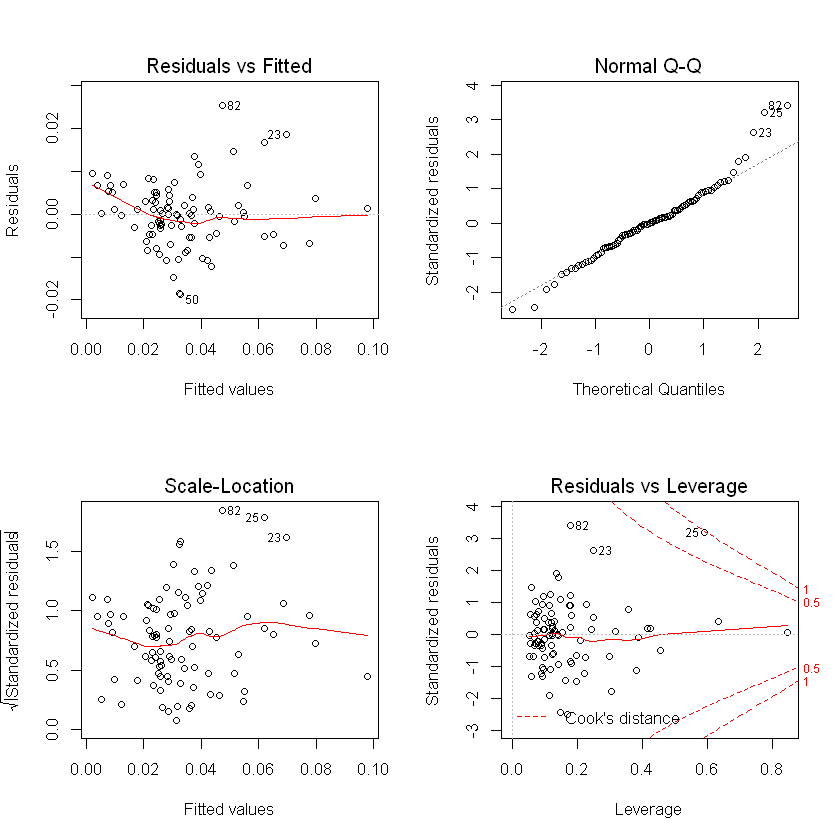

In [37]:
# regression diagnostics plots to check data assumptions
par(mfrow=c(2,2))
plot(model3)

**Figure 4.5: Model 3 Fields Correlation Matrix**

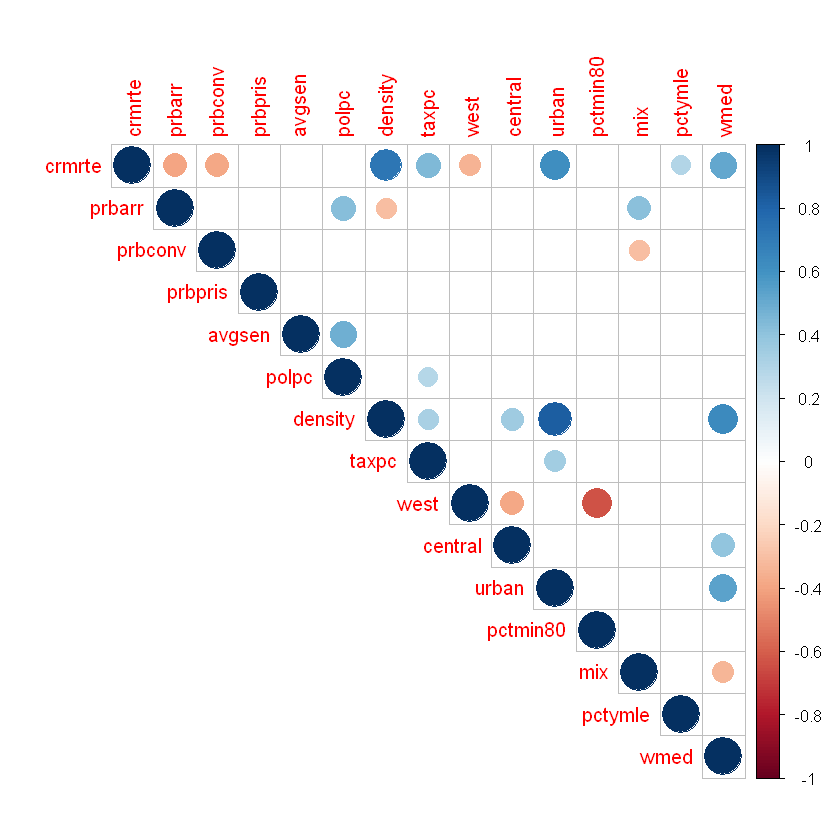

In [38]:
# create correlation matrix, remove county and year as they are unique identifiers
m3cor_matrix <- rcorr(as.matrix(m3df[,-c(1:2)]))

par(mfrow = c(1,1))
corrplot(m3cor_matrix$r, type = "upper", p.mat = m3cor_matrix$P, sig.level = 0.01, insig = "blank")

The correlation plot **Figure 4.5** shows a reduced amount of multicollinearity between the available variables when including the median wage variable and removing the industry specific wages. 

<h2> <font color = blue> 4.3 The Regression Table </font> </h2>

In [39]:
# Display Model 1, Model 2, Model 3 in regression table
stargazer(model1, model2, model3, type = "text", omit.stat = "f"
          , se = list(se.model1, se.model2, se.model3)
          , star.cutoffs = c(0.05, 0.01, 0.001)
          , column.labels = c("Model 1", "Model 2", "Model 3")
          )


                                  Dependent variable:              
                    -----------------------------------------------
                                        crmrte                     
                        Model 1         Model 2         Model 3    
                          (1)             (2)             (3)      
-------------------------------------------------------------------
prbarr                 -0.025**        -0.056***       -0.049***   
                        (0.008)         (0.013)         (0.012)    
                                                                   
density                0.007***        0.005***        0.006***    
                        (0.001)         (0.001)         (0.001)    
                                                                   
pctmin80                               0.0004***       0.0003**    
                                       (0.0001)        (0.0001)    
                                               

In the above table, all three models are evaluated at the 95%, 99%, and 99.9% confidence levels ($\alpha$ = 0.05, 0.01, and 0.001 respectively) . Given that the heteroskedasticity condition was not fully met, the table also includes the robust standard errors of each predictor in addition to the coefficient.

### 4.3.1  Statistical and Practical Significance for Key Effects

Explanatory Variables:
- **Probability of Arrest**, ${\beta }_{1}$: 
    - The coefficient for probability of arrest in model 3 is -0.049 where as it is  s -0.056 in model 2 and -0.025 in model 1.
    - Based off our Model 3 results, the p value for ${\beta }_{1}$ remains statistically significant at a 99.9\% confidence level ($\alpha $ = 0.001). We reject our null hypothesis and further support the results from Model 1 and 2.
- **Density**, ${\beta }_{2}$: 
    - The coefficient for density in model 3 is 0.006, where as it was 0.005 in model 2 and 0.007 in model 1.
    - Based off our Model 3 results, the p value for ${\beta }_{2}$ remains statistically significant at a 99.9\% confidence level ($\alpha $ = 0.001). Therefore we reject our null hypothesis and support the results from Model 1 and 2.
- **Tax per capita**, ${\beta }_{3}$: 
    - The coefficient for tax per capita in model 3 is 0.0002 which is the same in model 2 and only slightly different than the coefficient of 0.0003 in model 1. 
    - Based off our Model 3 results, the p value for ${\beta }_{3}$ remains statistically insignificant and is not strong evidence to reject our null hypothesis. However, this is in line with the results from Model 1 and 2. Tax per capita remains a highly actionable variable and can be influenced by local and macro aspects of tax systems.  
    
    
Covariates:

- **Percent Minority in 1980**, ${\beta }_{4}$:
    - The coefficient for this covariate is 0.030 in model 3 where as it was 0.036 in model 2. 
    - Based off our Model 3 results, the p value for ${\beta }_{4}$ is statistically significant at a 99\% confidence level ($\alpha$ = 0.01). While this is significant at a lower confidence level compared to Model 2 results, We maintain rejecting our null hypothesis and support the results from Model 2.
- **Percent Young Male**, ${\beta }_{5}$: 
    - The coefficient for this covariate is 0.076 in model 3 and 0.088 in model 2.
    - Based off our Model 3 results, the p value for ${\beta }_{5}$ is statistically insignificant at a 95\% confidence level ($\alpha$ = 0.05). Unlike the results from Model 2, we fail to reject our null hypothesis. However, this result has low practicial significance as the values of the coefficents are close in magnitude, so the p-value is likely fluctuating around $\alpha$ = 0.05. Additionally, this covariate was included for its weaker, but unique, correlation with crime rate, and therefore still holds as an important covariate withstanding the coefficient's weak statistical significance.
- **Probability of Conviction**, ${\beta }_{6}$: 
    - The coefficient for this covariate is -0.020 in model 3 and -0.019 in model 2.
    - Based off our Model 3 results, the p value for ${\beta }_{6}$ remains statistically significant at a 99.9\% confidence level ($\alpha$ = 0.001). We maintain rejecting our null hypothesis and support the results from Model 2. 
- **Police Per Capita**, ${\beta }_{7}$: 
    - The coefficient for this covariate is 6.6 in model 3 and 6.539 in model 2. 
    - Based off our Model 3 results, the p value for ${\beta }_{7}$ is now more statistically significant at a 99.9% confidence level ($\alpha $ = 0.001; previously statistically significant at $\alpha$ = 0.01). We reject our null hypothesis and further support the results from Model 2.
 
Considering the results in the table above, our aims to leverage tax, housing, and policing policies are practically significant and have an impact on reducing crime rate in the local area. Therefore, our suggestions regarding these aspects from Model 1 remain valid and valuable towards the political campaign. 


### 4.3.2  Interpretations and Conclusions

Overall, we confirm model 2 is the most accurate while parsimonious model that best explains the crime rate in North Carolina with the data available to us. When comparing Adjusted R squared values of 0.599, 0.808 and 0.810 for model 1, model 2 and model 3, respectively, we see that model 3 has the “best” fit with the highest Adjusted R squared value. R squared values can range from 0 to 1, where 1 is the strongest linear relationship. The Adjusted R squared value is a metric that penalizes the R squared value given the number of predictors included because it naturally inflates as more variables are included. However, looking at the AIC values of -535.4, -598.1, and -592.8 for model 1, model 2 and model 3, respectively, we see that model 2 has the lowest AIC score.  A lower AIC score suggests a better fit for multiple linear regression. Given model 2 has the lowest AIC score and the difference between the adjusted R square values for model 2 and 3 is 0.02, their adjusted R squared values are practically equivalent. Therefore, we conclude that additional predictors included in model 3 that were not included in model 2 complicates model 3’s interpretability, and inflates the associated adjusted R squared value.

In conclusion, the key variables and covariates in model 2 are strong predictors of crime rate. More explicity, this confirms our suggestions such as improving police capabilities, offer housing credits, and amend tax policies to be more socioeconomically progressive, clarify beneficial policy recommendations to address crime rates and strengthen the campaign.

<h2> <font color = blue> 5.0 The Omitted Variables Discussion </font> </h2>

We realize that crime rate is a complicated issue which may be determined by multiple factors besides from the predictors used in our models. We recognize that the following omitted variables may render bias to our models:
> **Wage**: various studies and researches support that raising minimum wage would decrease crime rate. Higher wages for low-skilled workers reduce both property and income inequality, which may leads to less violent crime/offenses. The dataset of our study includes weekly wages in different industry sector. However, we are unclear on how the wages were collected, or how the wage categories were determined. For instance, WTUC represents the weekly wage in transportation, utility and communication industry. However, the income gap in these three sectors could be substantial that the combining them together lose track of what could be the real determinants. With such considerations, we did not include these weekly wage variables in our models, and acknowledged that by omitting wage for low-skilled workers could have strong influence on crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model.
- We assume that the coefficient for wage for low-skilled workers (denoted as wlsw) is negative. 
- We assume that wlsw and taxpc are positively correlated, as higher wlsw could increase taxpc. Therefore, the omitted variable bias produced by wlsw would be positive on taxpc. 
- We further assume that wlsw and pctymle, or prbarr, or prbconv, or prbpris, or polpc are uncorrelated 
- We also assume that wlsw and density are negatively correlated, as higher wlsw could lead to more evenly distributed population and thus less density. Therefore, the omitted variable bias produced by wlsw would be negative on density. However, we believe that correlation may be less strong than wlsw and taxpc. 

> **Job opportunities**: more job opportunities improve income equality and living conditions of lower / middle income families, and thus could potentially reduce crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model. 
- We assume that the coefficient for job opportunity on crime rate (denoted as jo) is negative. 
- We assume that jo and taxpc are positively correlated, as higher jo could increase taxpc. Therefore, the omitted variable bias produced by jo would be positive on taxpc. 
- We further assume that jo and pctymle, or prbarr, or prbconv, or prbpris, or polpc are uncorrelated 
- We also assume that jo and density are negatively correlated, as higher jo could lead to more evenly distributed population, better equality and diversity, and thus less density. Therefore, the omitted variable bias produced by jo would be negative on density. However, we believe that correlation may be less strong than jo and taxpc. 

> **Education**: higher education improve people’s awareness of laws and rules, as well as sense of responsibility for the community, which as a result could reduce crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model. 
- We assume that the coefficient for education on crime rate (denoted as edu) is negative. 
- We assume that edu and taxpc are positively correlated, as higher edu could increase taxpc. Therefore, the omitted variable bias produced by edu would be positive on taxpc. 
- We further assume that edu and density, pctymle, or prbarr, or prbconv, or prbpris, or polpc are uncorrelated 

> **Community interactions / connections**: enriching sense of community belonging could also reduce crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model. 
- We assume that the coefficient for community connections on crime rate (denoted as comm) is negative. 
- We assume that comm and taxpc are positively correlated, as higher comm could increase taxpc. Therefore, the omitted variable bias produced by comm would be positive on taxpc. 
- We further assume that comm and pctymle, or prbarr, or prbconv, or prbpris, or polpc are uncorrelated 
- We also assume that comm and density are positively correlated, as higher comm could lead to more tighter community and higher density. Therefore, the omitted variable bias produced by comm would be positive on density. 

> **Family background**: we believe that the better the parent-child relationship, the less chance of a child to be involved in crime, and therefore reduce crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model. 
- We assume that the coefficient for family background on crime rate (denoted as fbac) is negative. 
- We assume that fbac and taxpc are positively correlated, as the better the family background, the higher taxpc. Therefore, the omitted variable bias produced by family background would be positive on taxpc.
- We further assume that fbac and pctymle, or prbarr, or prbconv, or prbpris, or polpc, or density are uncorrelated. 

> **Social status (lower / middle / upper class)**: Socio-economic status encompasses education, financial security, subjective perception of social status and privileges. We assume that the higher the social status, the lower the crime rate. Below are our assumptions and estimate on how this omitted variable could affect our model.
- We assume that the coefficient for social status on crime rate (denoted as socs) is negative.
- We assume that socs and taxpc are positively correlated in that with higher social status, taxpc becomes higher. Therefore, the omitted variable bias produced by family background would be positive on taxpc.
- However, social status and density could take on either positive or negative correlation. For example, a county with high social status could be appealing, thus increasing the density. On the other hand, the group with low social status may tend to conglomerate in a more affordable county, which increases the density as well. Without additional information, we are unable to assign a direction for the relationship between social status and density.
- We further assume that socs and pctymle, or prbarr, or prbconv, or prbpris, or polpc are uncorrelated. 

> **Gang concentration**: proximity to criminal organizations may increase crime rate in an area directly or indirectly. Below are our assumptions and estimate on how this omitted variable could affect our model:
- We assume the coefficient for gang concentration on crime rate (denoted as gangc) is positive
- We further assume that gangc, pctymle, prbarr, and polpc are positive correlated, as gangs typically recruit young male into their ranks, either from around the neighborhood or from neighboring areas. A higher gang concentration can also lead to higher police concentration and arrests due to increased criminal activity. Therefore, the omitted variable bias produced by gang concentration would be positive on pctymle and prbarr.
- Lastly, we also assume that gangc and density are positively correlated, as higher gangc could lead to more densely populated. Therefore, the omitted variable bias produced by gangc would be positive on density. However, we believe that correlation may be less strong than gangc and pctymle, prbarr, and polpc. 


<h2> <font color = blue> 6.0 Conclusion </font> </h2>

In this research, we set out to study how to leverage tax, policing and housing policy in order to recommend actions to lower crime for our political campaign. From the analysis, we recommend Model 2 as the model to best understand the effects of these explanatory variables. Further exploring the omitted variables as mentioned above could better improve our model and future campaigns. 
 
To lower local crime rate, we suggest a more progressive tax system, more detailed criminal laws and regulations, increased police training, and re-evaluating zoning rules to better distribute local population for diversity, and improved social and economic equality. Policies that affect these key variables will also impact strong covariates or lagging response variables associated with crime rate such as police per capita and the probability of conviction. While beyond the scope of the current analysis and political campaign, further work could be focused on studying the effect of income gap, crime participation of young males and easing the minority into the population.